<a href="https://colab.research.google.com/github/rdcool92/almabetter-pythonEDA-capstone-project/blob/main/EDA_Capston_play_store_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#**We Are Going To Answer These Questions** 


1.   What are the top 5 apps on the basis of installs?
2.   What is the top 5 expensive apps?
3.   What is the top 5 reviewed apps?
4.   What are the top 5 most installed apps in game category?
5.   Which 5 apps from the family category are having the lowest rating?




In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# code to remove warning at top of the plot
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

<ipython-input-2-d0c4a47b8e66>:4: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# uploading dataset and creating respective dataframe
review='/content/drive/MyDrive/User Reviews.csv'
app='/content/drive/MyDrive/Play Store Data.csv'
review_df=pd.read_csv(review)
app_df=pd.read_csv(app)

# `Data Exploration`

In [ ]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
app_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
review_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


**Cleaning Data**

Looking for and handling NaN/Null/Missing Values

In [ ]:
# Null values in each columns in app dataframe
app_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Droping duplicate rows**

In [ ]:
# Number of duplicated rows.
# df.duplicated().sum() function counts no of duplicate rows in a dataframe.
app_df.duplicated().sum()

483

In [ ]:
# Now, removing duplicate rows
app_df.drop_duplicates(inplace=True)
app_df.duplicated().sum()

0

In [ ]:
# Each app should have single entry in app dataframe because it contains information about a particular app,such as Rating, Reviews, Size, Installs etc
app_df.App.value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Theme Android P Black design for LG V30          1
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9660, dtype: int64

In [ ]:
# We observe that same app has many entries and only slight differences is in their Reviews.
app_df[app_df['App']=='Zombie Catchers']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1693,Zombie Catchers,GAME,4.7,990491,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up
1727,Zombie Catchers,GAME,4.7,990586,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up
1898,Zombie Catchers,GAME,4.7,990723,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up
1924,Zombie Catchers,GAME,4.7,990663,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up
1982,Zombie Catchers,GAME,4.7,990796,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up
4244,Zombie Catchers,GAME,4.7,989158,75M,"10,000,000+",Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up


same app is in two categories and has only difference in Reviews. Now , we need to group by App and Category and aggregated on reviews.

In [ ]:
app_df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Rating**

In [ ]:
# Rating column has 1465 null values
app_df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
# Now, we need to replace outlier 19. and nan with average ratings.
app_df['Rating'].replace(np.nan, round(app_df['Rating'].mean(),1),inplace=True)
app_df['Rating'].replace(19.,round(app_df['Rating'].mean(),1),inplace=True)

Text(0, 0.5, 'Ratting')

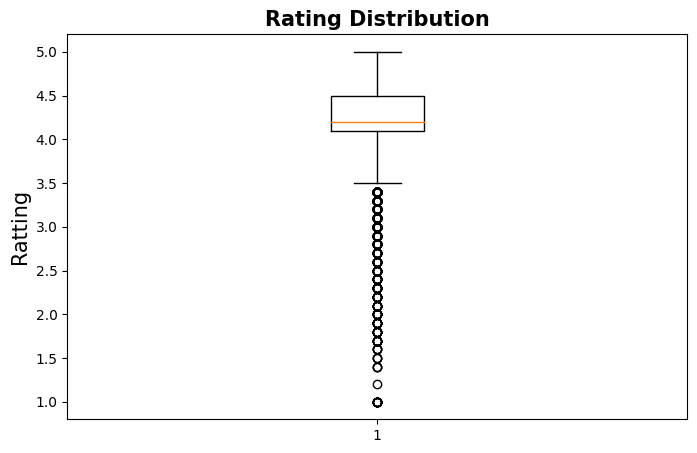

In [ ]:
# Box Plot
fig = plt.figure(figsize =(8, 5))
ratting_list=list(app_df.Rating.unique())
plt.boxplot(app_df.Rating)
plt.title('Rating Distribution',size=15,fontweight='bold')
plt.ylabel('Ratting',size=15)


**Reviews**

In [ ]:
#reviews data contains some values in  Million format such as 200M,100M,etc so we need to convert it in numeric by using ( 1M =1000000)
app_df['Reviews']=pd.to_numeric(app_df['Reviews'],errors='coerce')

In [ ]:
app_df['Size'].unique()[:10]

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M'], dtype=object)

In [ ]:
# '1,000+' is a value in one row of column 'Size', remove this row from df_1

x=app_df[app_df['Size']=='1,000+'].index
app_df.drop(axis=0, inplace=True, index=x)

In [ ]:
app_df.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10357, dtype: object

In [ ]:
def remove_end_letter(size):
  if size[-1]=='M':
    size=size[:-1]
    return float(size)
  elif size[-1]=='k':
    return float(size[:-1])/1000
  else:
    return 0.0

In [ ]:
app_df.Size=app_df.Size.apply(remove_end_letter)

In [ ]:
# Replacing the 0.0 value with mean values
app_df['Size']=app_df['Size'].replace(0.0,app_df['Size'].mean())

**Installs**

In [ ]:
app_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
# data cleaning of Installs column
app_df.Installs=app_df.Installs.apply(lambda x : x.replace(',','') if ',' in x else x)
app_df.Installs=app_df.Installs.apply(lambda x : x.replace('+','') if '+' in x else x)
app_df.Installs=app_df.Installs.astype(int)

**'Type', 'Current Ver' and 'Android Ver'**

In [ ]:
app_df.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10357, dtype: int64

In [ ]:
# mode of categorical values
print(app_df['Type'].mode())
print(app_df['Current Ver'].mode())
print(app_df['Android Ver'].mode())

0    Free
Name: Type, dtype: object
0    Varies with device
Name: Current Ver, dtype: object
0    4.1 and up
Name: Android Ver, dtype: object


In [ ]:
# Fill the missing categorical values with modes

app_df['Type'].fillna(str(app_df['Type'].mode().values[0]),inplace=True)
app_df['Current Ver'].fillna(str(app_df['Current Ver'].mode().values[0]),inplace=True)
app_df['Android Ver'].fillna(str(app_df['Android Ver'].mode().values[0]),inplace=True)

**Price**

In [ ]:
app_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
# data cleaning of 'price' column

app_df['Price']=app_df['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
app_df['Price']=app_df['Price'].apply(lambda x: float(x))

**Content Rating**

In [ ]:
app_df['Content Rating'].value_counts()

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

**Last Updated**

In [ ]:
app_df['Last Updated']=pd.to_datetime(app_df['Last Updated'])

In [ ]:
app_df['updated_year']=app_df['Last Updated'].dt.year

In [ ]:
app_df.head()
app_df['updated_year'].value_counts().sort_index()

2010       1
2011      15
2012      26
2013     108
2014     204
2015     454
2016     789
2017    1826
2018    6934
Name: updated_year, dtype: int64

Text(0.5, 1.0, 'Last update year')

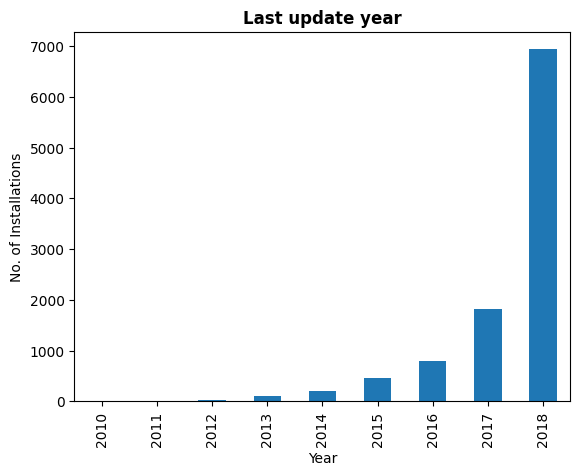

In [ ]:
#Last update year
app_df['updated_year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year',size=10)
plt.ylabel('No. of Installations',size=10)
plt.title('Last update year',size=12,fontweight='bold')

In [ ]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  float64       
 4   Size            10357 non-null  float64       
 5   Installs        10357 non-null  int64         
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10357 non-null  object        
 12  Android Ver     10357 non-null  object        
 13  updated_year    10357 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)


**Review dataset**

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
review_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
review_df[review_df['Sentiment'].isnull() & review_df['Translated_Review'].isnull() & review_df['Sentiment_Polarity'].isnull() & review_df['Sentiment_Subjectivity'].isnull()  ]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
review_df=review_df.drop(review_df[(review_df['Translated_Review'].isnull()) & (review_df['Sentiment'].isnull())& 
                         (review_df['Translated_Review'].isnull())& (review_df['Sentiment_Subjectivity'].isnull())].index)
review_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [ ]:
26863+37432 

64295

In [ ]:
review_df=review_df[~review_df['Translated_Review'].isnull()]
review_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [ ]:
review_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
review_df.Sentiment_Polarity.describe()

count    37427.000000
mean         0.182171
std          0.351318
min         -1.000000
25%          0.000000
50%          0.150000
75%          0.400000
max          1.000000
Name: Sentiment_Polarity, dtype: float64

**Cleaning column 'App'**

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
review_df.duplicated().sum()

7735

**Joined Dataset (Inner Join)**

In [ ]:
combined_df=pd.merge(app_df,review_df, how='inner', on=['App'])

In [ ]:
combined_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,updated_year,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,I hate,Negative,-0.800,0.900000


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59163 entries, 0 to 59162
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     59163 non-null  object        
 1   Category                59163 non-null  object        
 2   Rating                  59163 non-null  float64       
 3   Reviews                 59163 non-null  float64       
 4   Size                    59163 non-null  float64       
 5   Installs                59163 non-null  int64         
 6   Type                    59163 non-null  object        
 7   Price                   59163 non-null  float64       
 8   Content Rating          59163 non-null  object        
 9   Genres                  59163 non-null  object        
 10  Last Updated            59163 non-null  datetime64[ns]
 11  Current Ver             59163 non-null  object        
 12  Android Ver             59163 non-null  object

In [ ]:
combined_df.isnull().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
updated_year              0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
df=combined_df[['Size','Installs','Rating','Reviews']]

In [ ]:
df.corr()

,Size,Installs,Rating,Reviews
Size,1.000000,0.076394,0.132980,0.333963
Installs,0.076394,1.000000,-0.018281,0.512699
Rating,0.132980,-0.018281,1.000000,0.116852
Reviews,0.333963,0.512699,0.116852,1.000000


<Axes: >

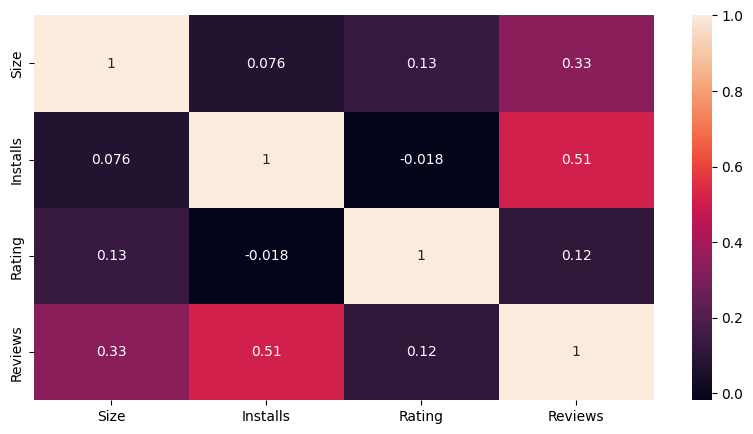

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

**Visualisation and Insights**

In [ ]:
combined_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,updated_year,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,It bad >:(,Negative,-0.725,0.833333


**Top 10 app categories by installations**

In [ ]:
top10_category=app_df.groupby(['Category']).agg({'Installs':np.sum}).sort_values('Installs',ascending=False)[:10]
top10_category.sort_values('Installs',ascending=False)

,Installs
Category,
GAME,31544024415
COMMUNICATION,24152276251
SOCIAL,12513867902
PRODUCTIVITY,12463091369
TOOLS,11452771915
FAMILY,10041692505
PHOTOGRAPHY,9721247655
TRAVEL_AND_LOCAL,6361887146
VIDEO_PLAYERS,6222002720


<ipython-input-59-b9f76e3e5096>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


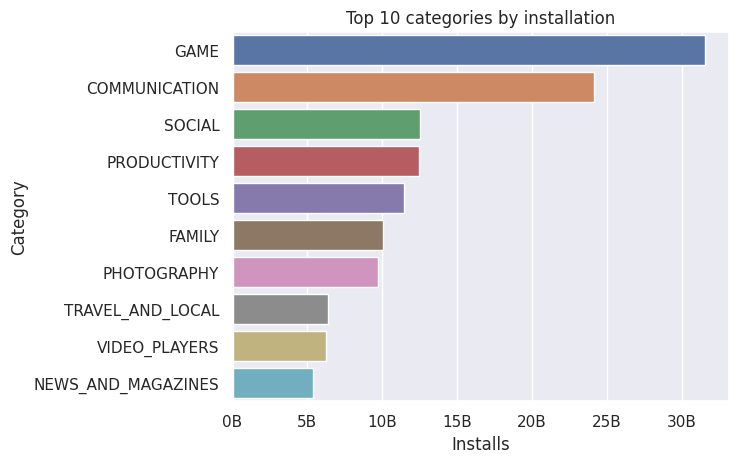

In [ ]:
# ax = plt.subplots()  
sns.set(style='darkgrid')
g=sns.barplot(y=top10_category.index,x='Installs',data=top10_category,orient='h')
xlabels = ['{:,.0f}'.format(x) + 'B' for x in g.get_xticks()/1000000000]
g.set_xticklabels(xlabels)
plt.title('Top 10 categories by installation')
plt.show()

**Observation:** The above graph shows that top 5 app categories by installations are game, communication,social,productivity,tools respectively.

**Top 5 App in each Category by installation:**

That would help in detrmining potential categorty to inter in for app making. Top five apps in each category would helps us to identify our competitors.

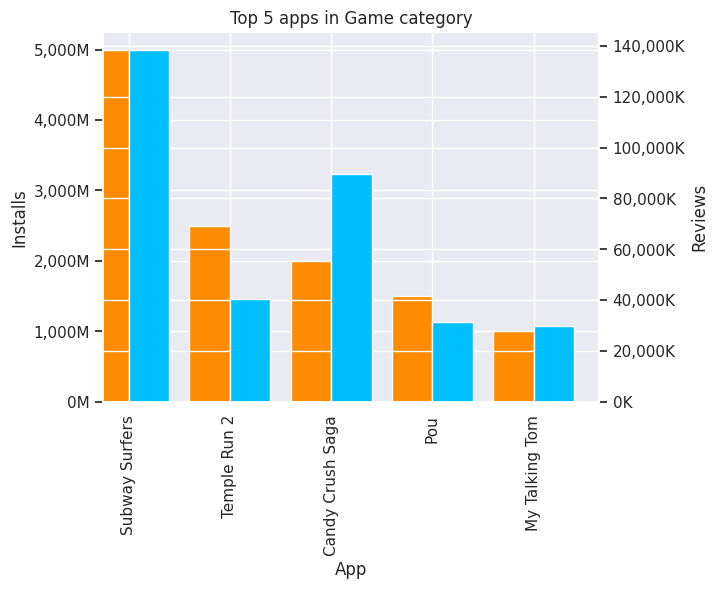

<Figure size 1500x800 with 0 Axes>

In [ ]:
# Top 5 GAME app
fig = plt.figure() # Create matplotlib figure
plt.figure(figsize=(15,8))

import matplotlib.ticker as ticker

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
top5game_app_by_install=app_df[app_df['Category']=='GAME'].groupby(['App']).agg({'Installs':np.sum,'Reviews':np.sum}).sort_values('Installs',ascending=False).head()
top5game_app_by_install.Installs.plot(kind='bar', color='darkorange', ax=ax, width=width, position=1)
top5game_app_by_install.Reviews.plot(kind='bar', color='deepskyblue', ax=ax2, width=width, position=0)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax.set_ylabel('Installs')
ax.set_title('Top 5 apps in Game category')
ax2.set_ylabel('Reviews')

plt.show()

**Observation:** Subway Surfers app is on top in the game category by installations and reviews.

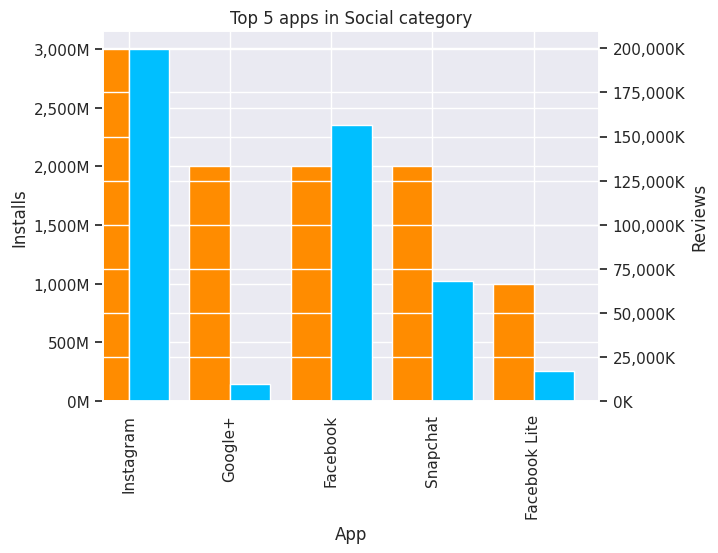

<Figure size 1500x800 with 0 Axes>

In [ ]:
# Top 5 Social app
import os    
local_download_path = os.path.expanduser('/content/drive/MyDrive/EDA Capston Project')
plot_filepath = os.path.join(local_download_path, "plot.png")



fig = plt.figure() # Create matplotlib figure
plt.figure(figsize=(15,8))

import matplotlib.ticker as ticker

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
top5Social_app_by_install=app_df[app_df['Category']=='SOCIAL'].groupby(['App']).agg({'Installs':np.sum,'Reviews':np.sum}).sort_values('Installs',ascending=False).head()
top5Social_app_by_install.Installs.plot(kind='bar', color='darkorange', ax=ax, width=width, position=1)
top5Social_app_by_install.Reviews.plot(kind='bar', color='deepskyblue', ax=ax2, width=width, position=0)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax.set_ylabel('Installs')
ax.set_title('Top 5 apps in Social category')
ax2.set_ylabel('Reviews')

plt.show()


**Observation:** Instagram app is on top in the Social category by installations and reviews.

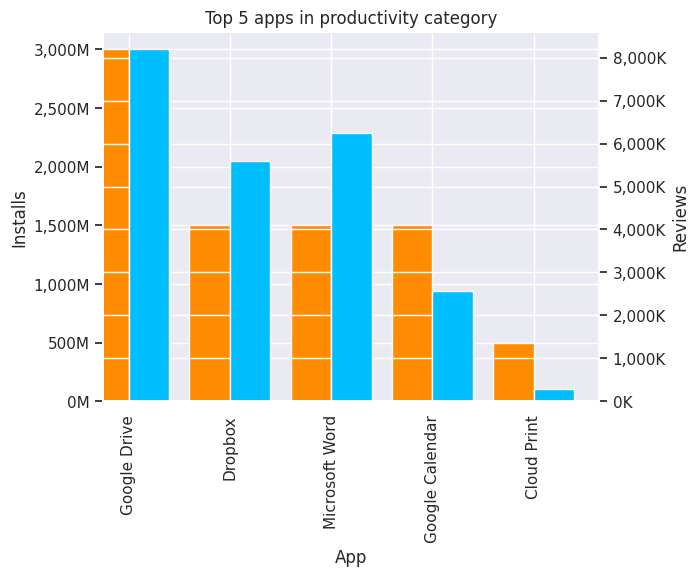

<Figure size 1500x800 with 0 Axes>

In [ ]:
# Top 5 PRODUCTIVITY app
fig = plt.figure() # Create matplotlib figure
plt.figure(figsize=(15,8))

import matplotlib.ticker as ticker

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
top5PRODUCTIVITY_app_by_install=app_df[app_df['Category']=='PRODUCTIVITY'].groupby(['App']).agg({'Installs':np.sum,'Reviews':np.sum}).sort_values('Installs',ascending=False).head()
top5PRODUCTIVITY_app_by_install.Installs.plot(kind='bar', color='darkorange', ax=ax, width=width, position=1)
top5PRODUCTIVITY_app_by_install.Reviews.plot(kind='bar', color='deepskyblue', ax=ax2, width=width, position=0)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax.set_ylabel('Installs')
ax.set_title('Top 5 apps in productivity category')
ax2.set_ylabel('Reviews')

plt.show()

**Observation:** Google drive app is on top in the productivity category by installations and reviews.

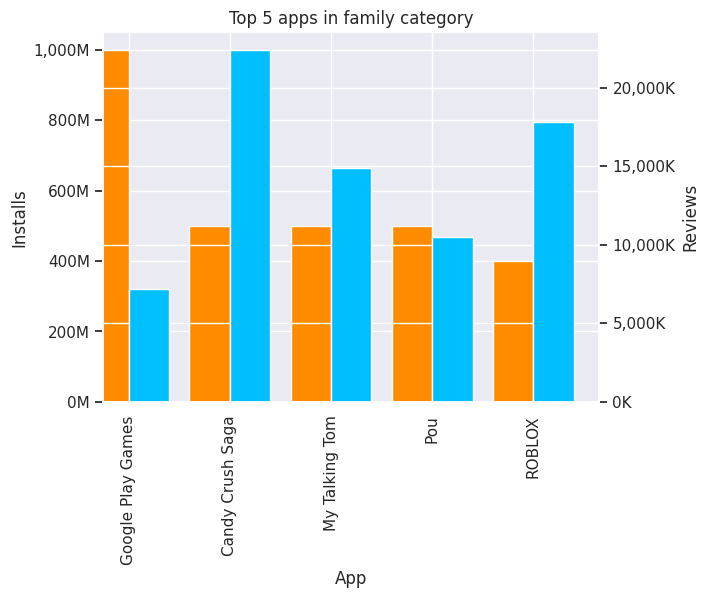

<Figure size 1500x800 with 0 Axes>

In [ ]:
# Top 5 FAMILY app
fig = plt.figure() # Create matplotlib figure
plt.figure(figsize=(15,8))

import matplotlib.ticker as ticker

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
top5FAMILY_app_by_install=app_df[app_df['Category']=='FAMILY'].groupby(['App']).agg({'Installs':np.sum,'Reviews':np.sum}).sort_values('Installs',ascending=False).head()
top5FAMILY_app_by_install.Installs.plot(kind='bar', color='darkorange', ax=ax, width=width, position=1)
top5FAMILY_app_by_install.Reviews.plot(kind='bar', color='deepskyblue', ax=ax2, width=width, position=0)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax.set_ylabel('Installs')
ax.set_title('Top 5 apps in family category')
ax2.set_ylabel('Reviews')

plt.show()

**Observation:** Google Play Games app is on top in the family category by installations and reviews.

Text(0.5, 1.0, 'Top 5 apps in Photography category')

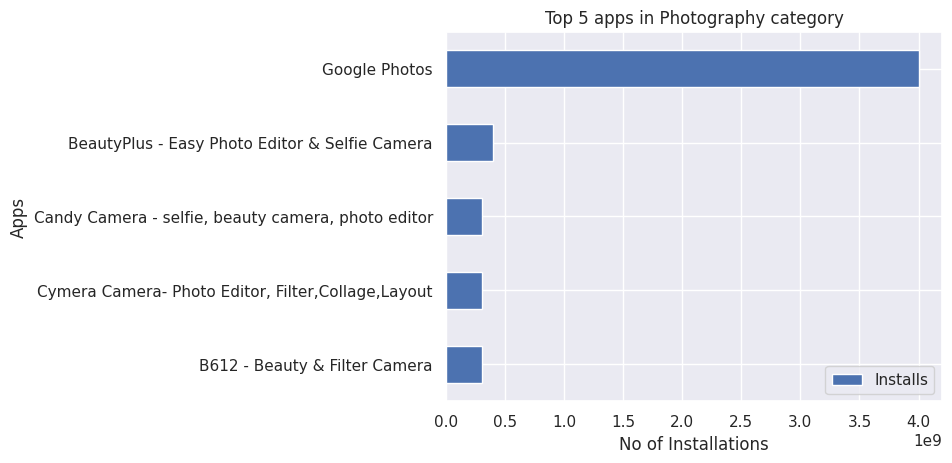

In [ ]:
# top 5 apps in PHOTOGRAPHY
top5PHOTOGRAPHY_app_by_install=app_df[app_df['Category']=='PHOTOGRAPHY'].groupby(['App']).agg({'Installs':np.sum}).sort_values('Installs',ascending=False).head()
top5PHOTOGRAPHY_app_by_install.sort_values('Installs').plot(kind='barh')
plt.xlabel('No of Installations')
plt.ylabel('Apps')
plt.title('Top 5 apps in Photography category')

**Observation:** Google Photos app is on top in the Photography category by installations.

Text(0.5, 1.0, 'Top 5 apps in news and magazines category')

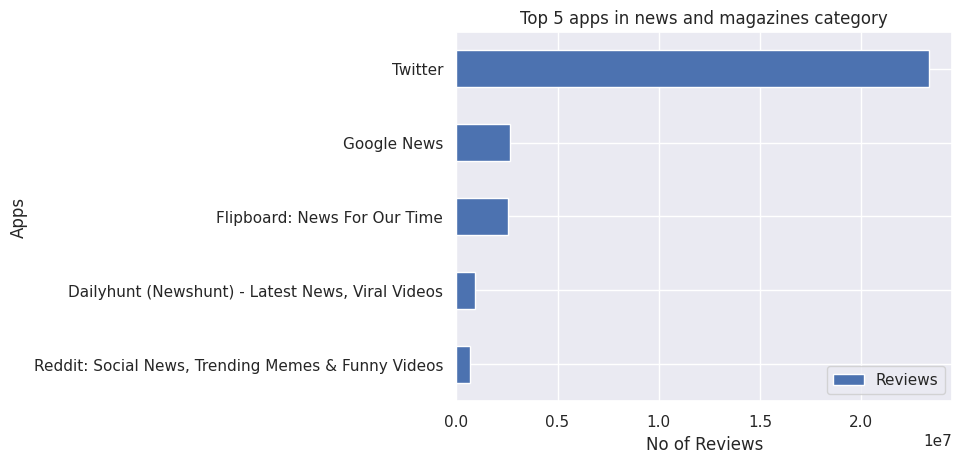

In [ ]:
# top 5 apps in NEWS_AND_MAGAZINES
top5NEWS_AND_MAGAZINES_app_by_install=app_df[app_df['Category']=='NEWS_AND_MAGAZINES'].groupby(['App']).agg({'Reviews':np.sum}).sort_values('Reviews',ascending=False).head()
top5NEWS_AND_MAGAZINES_app_by_install.sort_values('Reviews').plot(kind='barh')
plt.xlabel('No of Reviews')
plt.ylabel('Apps')
plt.title('Top 5 apps in news and magazines category')

In [ ]:
top10_apps_by_install=app_df.groupby(['App']).agg({'Installs': np.mean}).sort_values('Installs',ascending=False).head(10)
top10_apps_by_install.sort_values('Installs')

,Installs
App,
Google,1.000000e+09
Google Street View,1.000000e+09
Subway Surfers,1.000000e+09
Facebook,1.000000e+09
Skype - free IM & video calls,1.000000e+09
Gmail,1.000000e+09
Google Chrome: Fast & Secure,1.000000e+09
Google Drive,1.000000e+09
Google News,1.000000e+09


Text(0.5, 1.0, 'Top 10 apps by reviews')

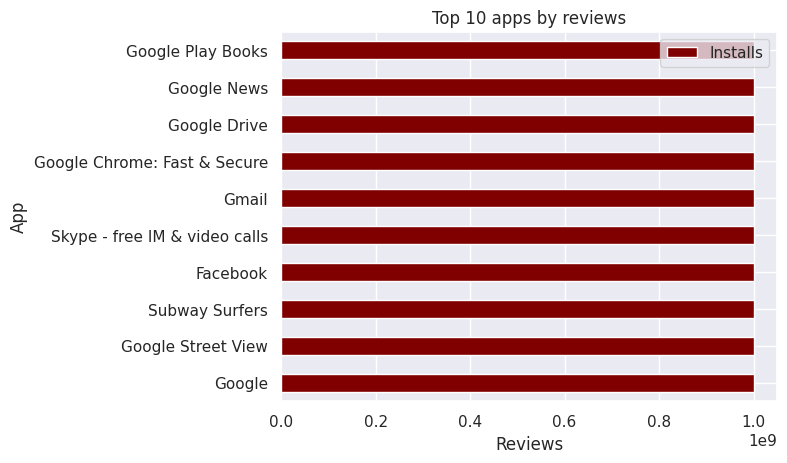

In [ ]:
top10_apps_by_install.sort_values('Installs', ascending=False).plot.barh(color ='maroon')
#plt.show()
plt.xlabel('Reviews')
plt.title('Top 10 apps by reviews')


**Observation:** Google Play Books is the most installed app in all category.



In [ ]:
# We observed that some apps have many entries having defferent reviews. So, now group by on apps and aggregate on reviews to obtain single entry.
top10_apps_by_reviews=app_df.groupby(['App']).agg({'Reviews': np.mean}).sort_values('Reviews',ascending=False).head(10)

In [ ]:
top10_apps_by_reviews

,Reviews
App,
Facebook,7.814326e+07
WhatsApp Messenger,6.911449e+07
Instagram,6.655489e+07
Messenger – Text and Video Chat for Free,5.664471e+07
Clash of Clans,4.488902e+07
Clean Master- Space Cleaner & Antivirus,4.291653e+07
Subway Surfers,2.772132e+07
YouTube,2.563943e+07
"Security Master - Antivirus, VPN, AppLock, Booster",2.490100e+07


Text(0.5, 1.0, 'Top 10 apps by reviews')

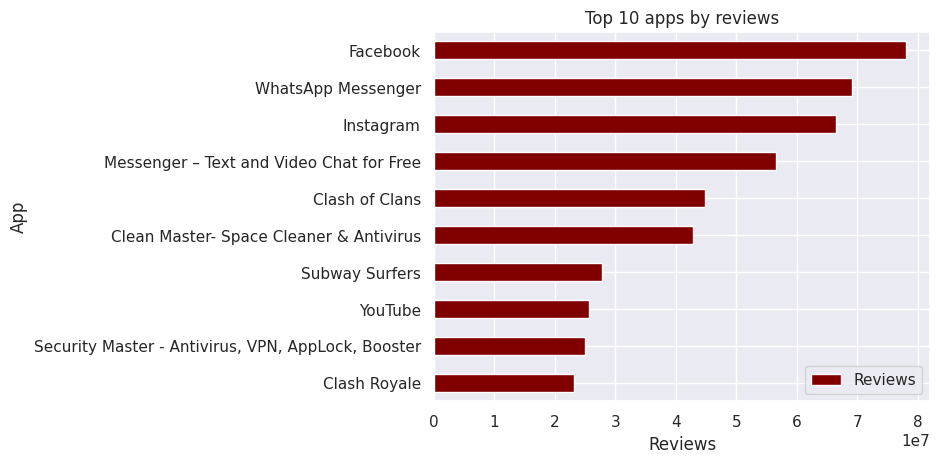

In [ ]:
#top10_apps_by_reviews.sort_values('Reviews').plot.barh(color ='maroon')
top10_apps_by_reviews.sort_values('Reviews').plot.barh(color ='maroon')
#plt.show()
plt.xlabel('Reviews')
plt.title('Top 10 apps by reviews')


**Observation:** Facebook app is the most reviwed app in all category.

<ipython-input-71-19c6d1e78b6b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


Text(0.5, 1.0, 'Top 10 apps by reviews')

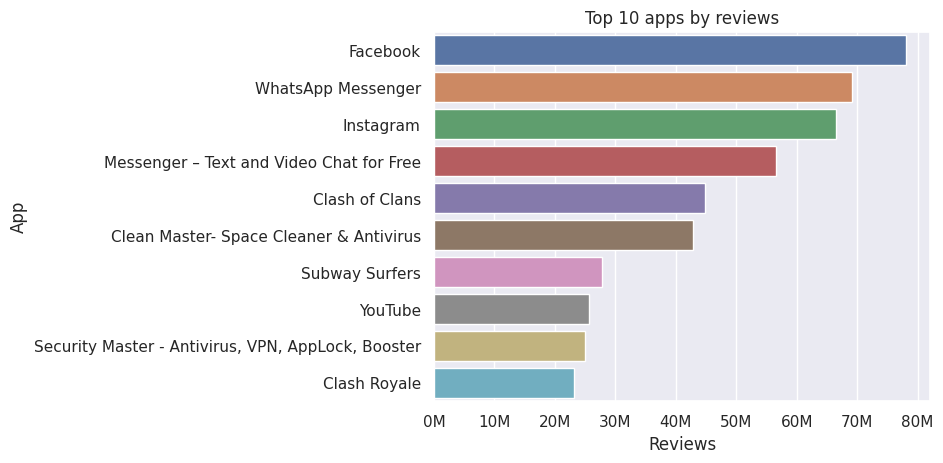

In [ ]:
#top10_apps_by_reviews.sort_values('Reviews').plot.barh(color ='maroon')
top10_apps_by_reviews=top10_apps_by_reviews.sort_values('Reviews',ascending=False)
sns.set(style='darkgrid')
g=sns.barplot(y=top10_apps_by_reviews.index,x='Reviews',data=top10_apps_by_reviews,orient='h')
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
plt.xlabel('Reviews')
plt.title('Top 10 apps by reviews')


**Observation:** Facebook app is the most reviwed app in all category.

In [ ]:
# top 10 app by size
top10_apps_by_size=app_df.groupby(['App']).agg({'Size': np.mean}).sort_values('Size',ascending=False).head(10)
top10_apps_by_size

,Size
App,
Vi Trainer,100.0
Navi Radiography Pro,100.0
Hungry Shark Evolution,100.0
Ultimate Tennis,100.0
Draft Simulator for FUT 18,100.0
Stickman Legends: Shadow Wars,100.0
Talking Babsy Baby: Baby Games,100.0
Post Bank,100.0
Miami crime simulator,100.0


In [ ]:
# Unique apps
print('reviews dataset:',review_df.App.nunique())
print('app dataset:',app_df.App.nunique())
print('combined dataset:',combined_df.App.nunique())

reviews dataset: 865
app dataset: 9659
combined dataset: 816


In [ ]:
app_df[app_df['Installs']>app_df['Installs'].mean()].groupby(['App']).agg({'Rating':np.mean}).sort_values('Rating',ascending=False).head(10)

,Rating
App,
"DU Recorder – Screen Recorder, Video Editor, Live",4.8
Period Tracker - Period Calendar Ovulation Tracker,4.8
Piano Tiles 2™,4.7
Brightest Flashlight Free ®,4.7
Bubble Witch 3 Saga,4.7
Toy Blast,4.7
CATS: Crash Arena Turbo Stars,4.7
Bible,4.7
Calculator - unit converter,4.7


In [ ]:
# Free and Paid Installation of top 10 categories
df=app_df[app_df['Category'].isin (['COMMUNICATION', 'SOCIAL', 'VIDEO_PLAYERS', 'PRODUCTIVITY',
       'PHOTOGRAPHY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT',
       'NEWS_AND_MAGAZINES', 'TOOLS'])].groupby(['Category','Type']).agg({'Installs':np.mean})
df

Installs
Category           Type              
COMMUNICATION      Free  7.124164e+07
                   Paid  5.037222e+04
ENTERTAINMENT      Free  2.252716e+07
                   Paid  1.000000e+05
GAME               Free  3.036891e+07
                   Paid  2.542164e+05
NEWS_AND_MAGAZINES Free  2.058478e+07
                   Paid  2.750000e+03
PHOTOGRAPHY        Free  3.218301e+07
                   Paid  9.893700e+04
PRODUCTIVITY       Free  3.288042e+07
                   Paid  5.043054e+04
SOCIAL             Free  4.517640e+07
                   Paid  2.000000e+03
TOOLS              Free  1.496869e+07
                   Paid  2.214668e+04
TRAVEL_AND_LOCAL   Free  2.827424e+07
                   Paid  1.525500e+04
VIDEO_PLAYERS      Free  3.638557e+07
                   Paid  1.775000e+04


*  Heatmap show correlattion between Rating,Reviews,Size,Installs,Price and update_year










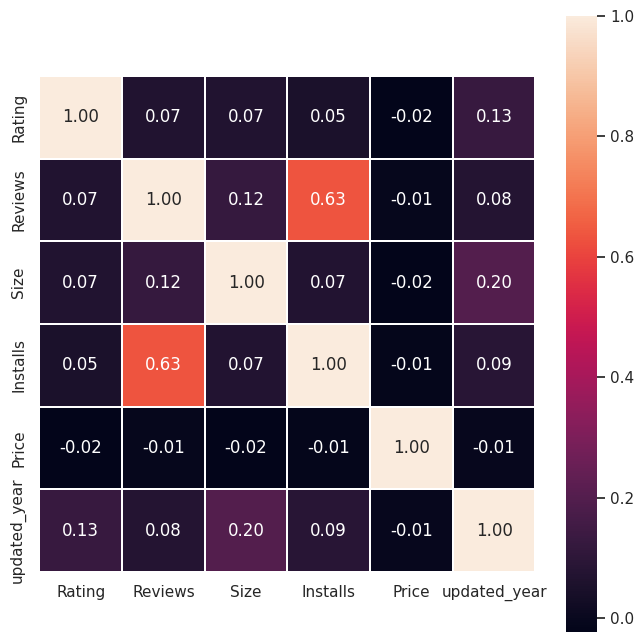

In [ ]:
fig, axes=plt.subplots(figsize=(8,8))
sns.heatmap(app_df.corr(),ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show();

**Observation:** Apps installs and reviews are 63 % positively correlated. App size and updation year are 22 % negatively correlated.



In [ ]:
group_name=app_df['Content Rating'].value_counts().index
group_val=app_df['Content Rating'].value_counts().values

Text(0.5, 1.0, 'Distribution of content Rating')

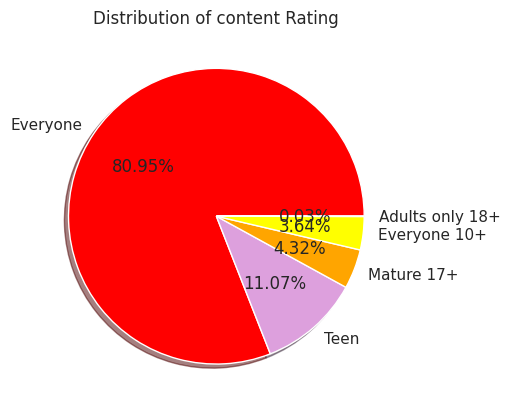

In [ ]:
plt.pie(group_val[:5],labels=group_name[:5],autopct='%1.2f%%',shadow=True,colors=['red','plum','orange','yellow','blue']);
plt.title('Distribution of content Rating')

**Observation:**
*   In Play store App record, maximum content rating are from Everyone after that Teen and then Mature 17+ and so on.

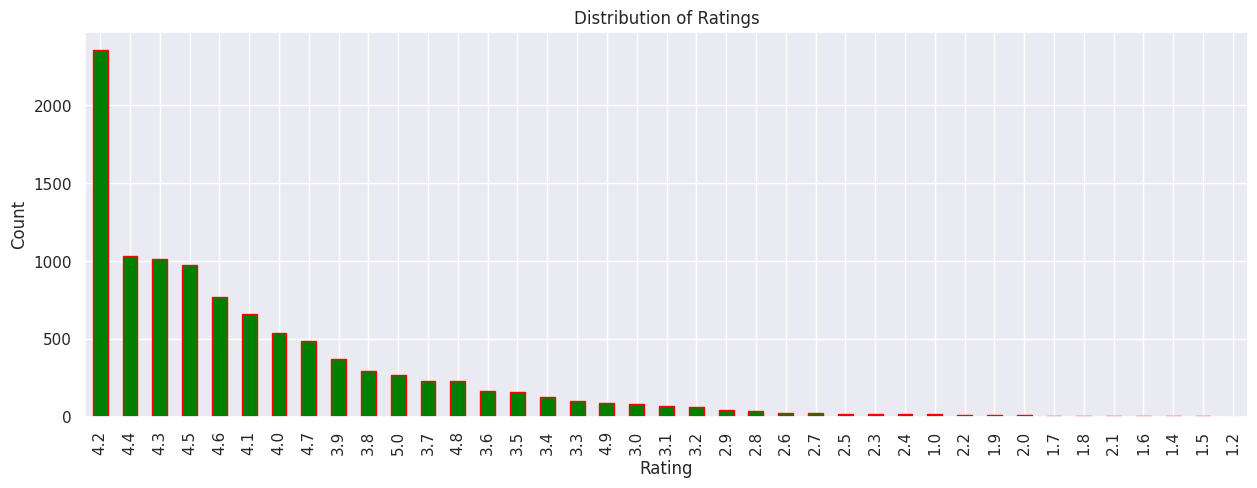

In [ ]:
app_df['Rating'].value_counts().plot(kind="bar",figsize=(15,5),edgecolor='red',colormap='Spectral', facecolor='green')
ax=plt.axis()
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show();

**Observation:**

*   Most of the apps have ratings in the range of 3.8 to 4.8
*   4.2 rating is given by more than 2500 people.



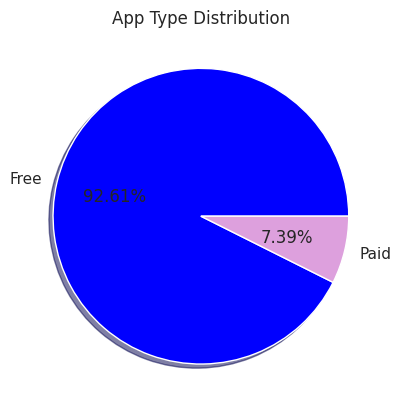

In [ ]:
y=app_df['Type'].value_counts()
plt.pie(y,labels=['Free','Paid'],autopct='%1.2f%%',shadow=True,colors=['blue','plum'])
plt.title('App Type Distribution');


**Observation:**


*   92.62% apps in the Play Store are Free Apps.




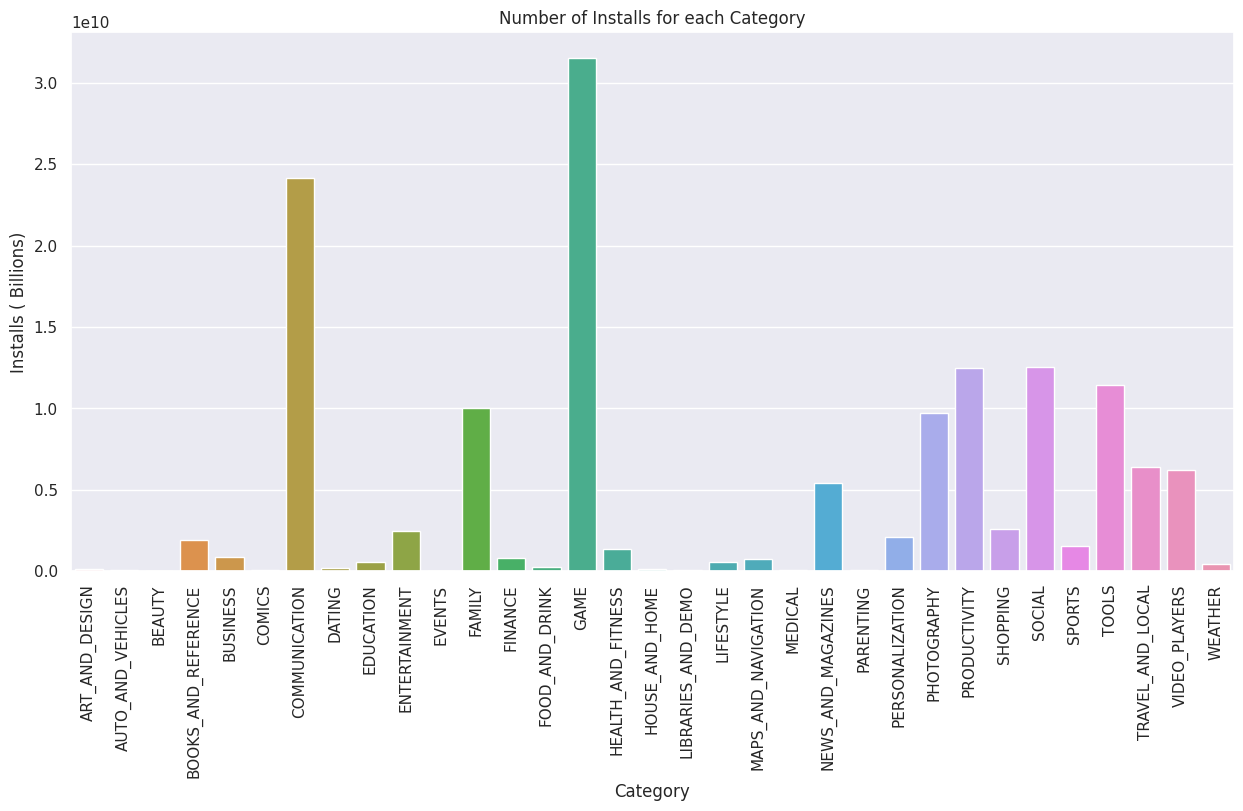

In [ ]:
import matplotlib.ticker as ticker
categories=app_df.groupby('Category')
d=categories[['Installs']].sum().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x='Category',y='Installs',data=d)
ax=plt.axis()
plt.xticks(rotation=90)
plt.ylabel('Installs ( Billions)')
plt.title('Number of Installs for each Category')
plt.show()


**Observation:**


*   Most of the apps being downloaded and installed are from the categories of Game and Communication.

*   Categories of least downloaded app are Parenting, Events and Beauty.

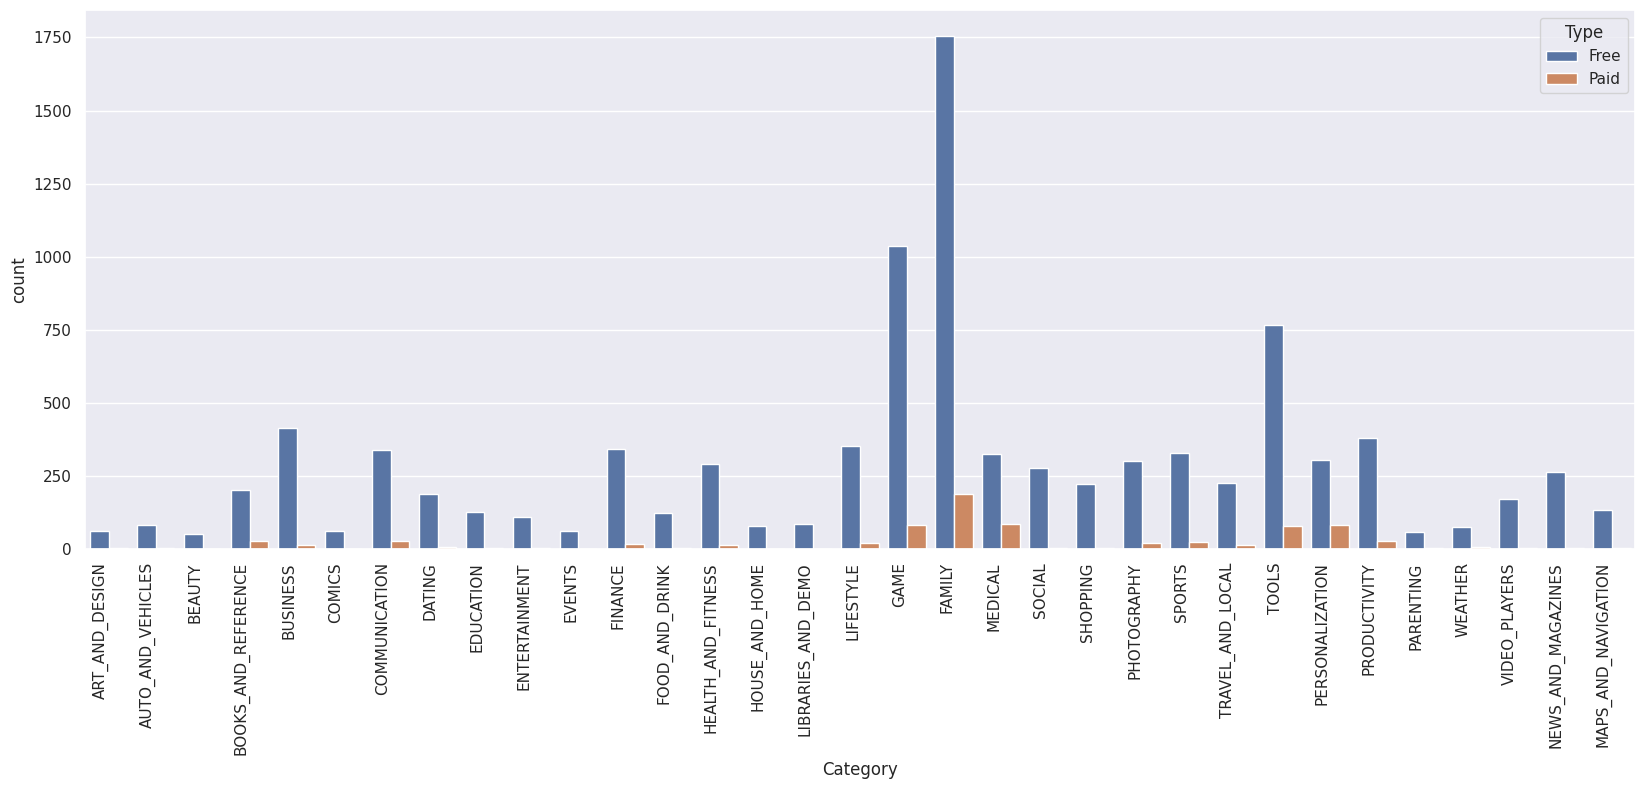

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x='Category',hue='Type',data=app_df)
ax=plt.axis()
plt.xticks(rotation=90,horizontalalignment='right');

**Observation:** The above graph shows that most of the free and paid apps are from game and family category.

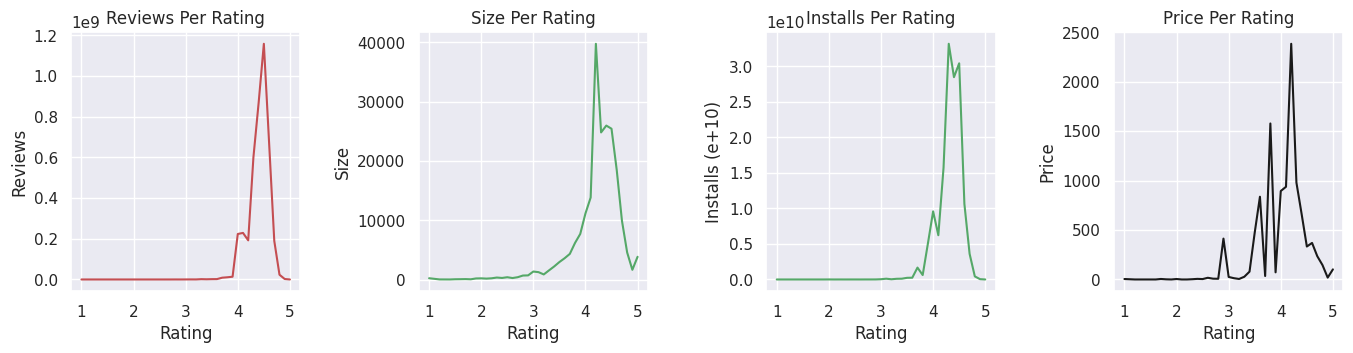

In [ ]:
# plot the graphs of reviews, size, installs and price per rating
combine_plot = app_df.groupby('Rating').sum().reset_index()

fig, axes = plt.subplots(1, 4, figsize=(14, 4))

axes[0].plot(combine_plot['Rating'], combine_plot['Reviews'], 'r')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')



axes[1].plot(combine_plot['Rating'], combine_plot['Size'], 'g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')


axes[2].plot(combine_plot['Rating'], combine_plot['Installs'], 'g')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (e+10)')
axes[2].set_title('Installs Per Rating')


axes[3].plot(combine_plot['Rating'], combine_plot['Price'], 'k')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')


plt.tight_layout(pad=2)
plt.show()

**Observation**: Most of the apps with higher rating range of 3.8-4.7 are having high amount of reviews,size and installs.
In terms of price, It does not reflect direct relationship with rating.

<Axes: xlabel='Sentiment_Subjectivity', ylabel='Count'>

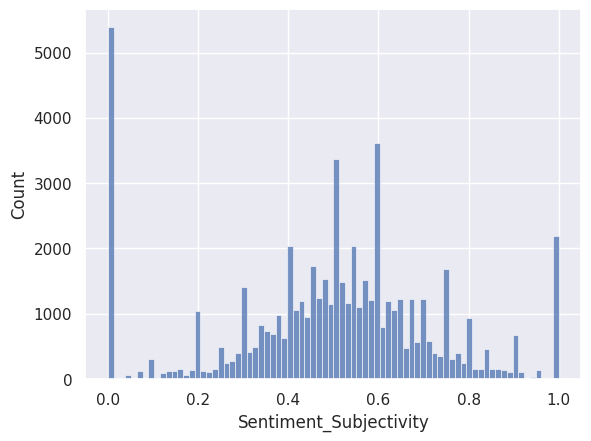

In [ ]:
sns.histplot(data=combined_df, x="Sentiment_Subjectivity")

**Observation:** It can be concluded from above hist plot that maximum subjectivity lies between 0.4 and 0.7 which means maximum number of users have given reviews according their experience.

<Axes: xlabel='Price', ylabel='Rating'>

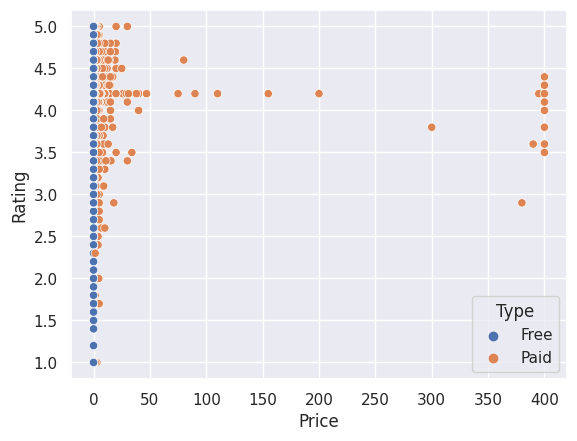

In [ ]:
# Distrivution of rating vs price
sns.scatterplot(data=app_df, x="Price", y="Rating",hue='Type')

**Observation:** The above scatter plot shows that most of the paid apps ratings are clustered in range of 3.5-5.

In [ ]:
combined_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,updated_year,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,It bad >:(,Negative,-0.725,0.833333


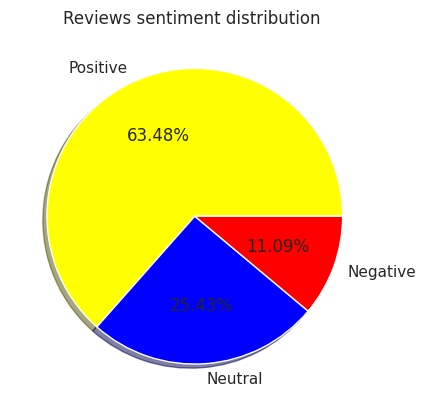

In [ ]:
y=combined_df['Sentiment'].value_counts()
plt.pie(y,labels=['Positive','Neutral','Negative'],autopct='%1.2f%%',shadow=True,colors=['yellow','blue','red'])
plt.title('Reviews sentiment distribution ');

**Observation:** The above pie chart shows that 63.48 % reviews is positive and 25.43 % reviews is neutral and 11.09% reviews is negative